In [1]:
import numpy as np
import scipy.io
import seaborn as sns
from scipy import stats, optimize, interpolate
import pandas as pd
from collections import defaultdict 
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy import stats
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import os, fnmatch
import sys

In [2]:
file_dirname = os.path.dirname('__file__')

from Python_scripts.python_modules.essential_genes_names import list_known_essentials
from Python_scripts.python_modules.gene_names import gene_aliases

In [5]:
transposon_density_file=os.path.join(file_dirname,'Python_scripts','Data_Files','transposon-density-per-gene-benoit.xlsx')
essential_list_1= os.path.join(file_dirname,'Python_scripts','Data_Files','Cervisiae_EssentialGenes_List_1.txt')
essential_list_2= os.path.join(file_dirname,'Python_scripts','Data_Files','Cervisiae_EssentialGenes_List_2.txt')
yeast_protein_names_list=os.path.join(file_dirname,'Python_scripts','Data_Files','Yeast_Protein_Names.txt')



data_transposon=pd.read_excel(transposon_density_file,header=0)
data_transposon=data_transposon.drop(['Unnamed: 0'],axis=1)
data_transposon=data_transposon.apply(lambda x: x.astype(str).str.lower()) # make everything lowercase


In [6]:
data_transposon

,Gene_name,Transposon_density_per_gene,Read_density_per_gene,Essential_gene
0,yal069w,0.03846153846153846,3.041666666666667,false
1,yal068w-a,0.0119047619047619,0.03174603174603174,false
2,pau8,0.008333333333333333,0.1388888888888889,false
3,yal067w-a,0.02222222222222222,0.2222222222222222,false
4,seo1,0.02473299606520517,1.793142214727375,false
...,...,...,...,...
6581,q0182,0.02238805970149254,0.2164179104477612,false
6582,cox2,0.04780876494023904,1.236387782204515,false
6583,q0255,0.07768361581920905,3.392655367231638,false
6584,cox3,0.07187112763320942,3.599752168525403,false


In [7]:
data_transposon['Transposon_density_per_gene']=data_transposon['Transposon_density_per_gene'].apply(lambda x: (float(x)))
data_transposon['Read_density_per_gene']=data_transposon['Read_density_per_gene'].apply(lambda x: (float(x)))

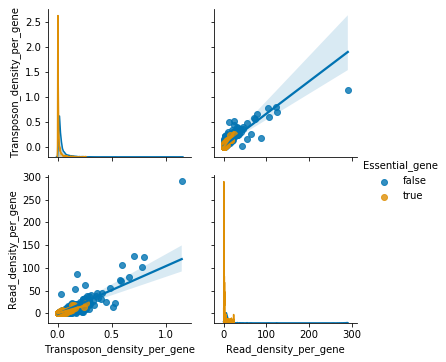

In [16]:
sns.pairplot(data=data_transposon,hue='Essential_gene',diag_kind='kde',kind='reg',palette='colorblind')

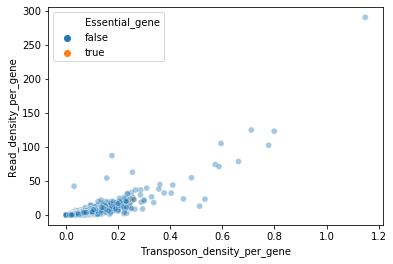

In [26]:
sns.scatterplot(data_transposon['Transposon_density_per_gene'],data_transposon['Read_density_per_gene'],hue=data_transposon['Essential_gene'],alpha=0.4)